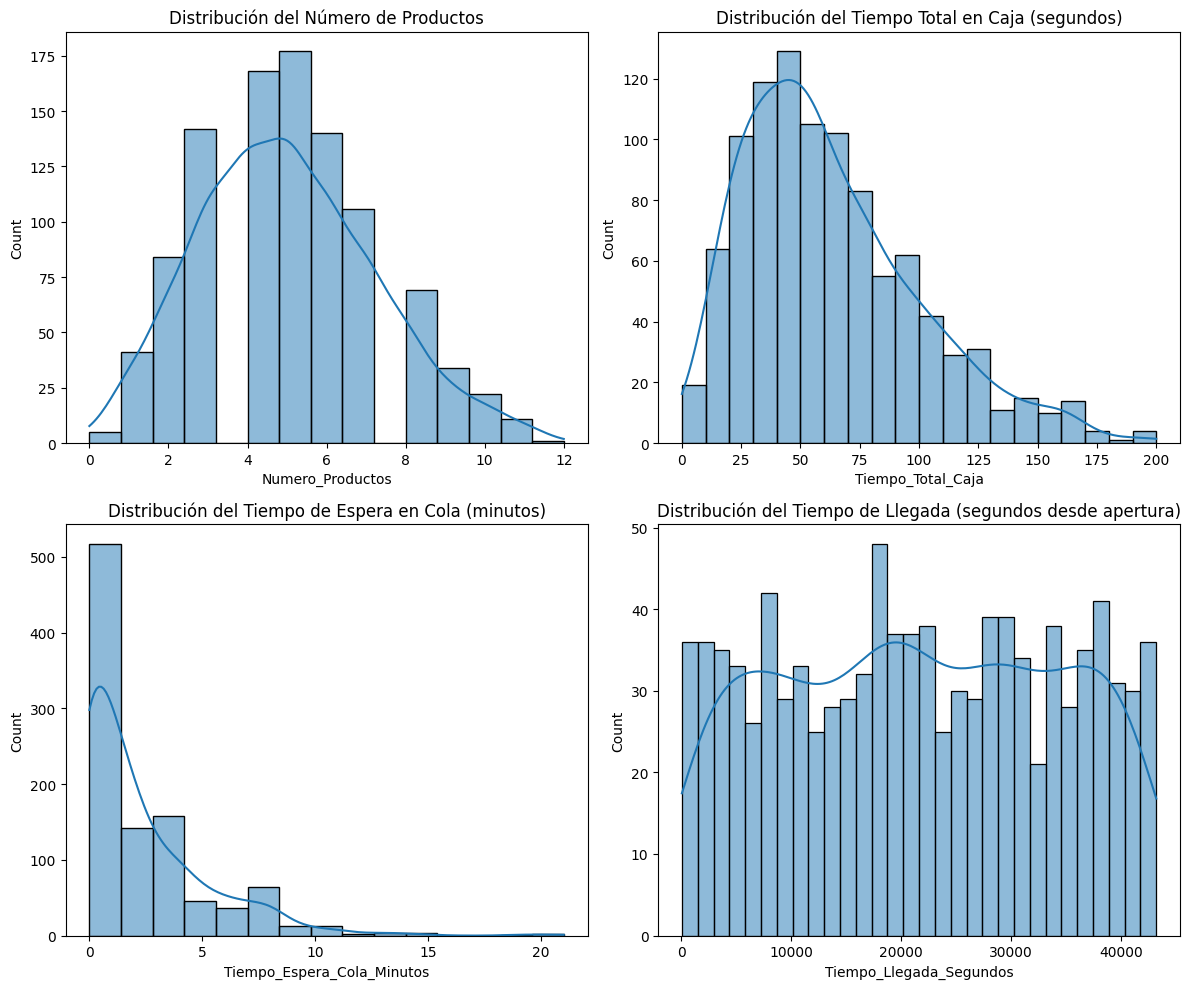

,Numero_Productos,Tiempo_Pago_Producto,Tiempo_Total_Caja,Tiempo_Espera_Cola_Minutos,Tiempo_Llegada_Segundos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.985000,12.530000,62.227000,2.394000,21653.942000
std,2.236465,4.578434,36.976841,2.846554,12498.313013
min,0.000000,5.000000,0.000000,0.000000,73.000000
25%,3.000000,9.000000,35.000000,0.000000,10738.750000
50%,5.000000,12.000000,55.000000,1.000000,21386.500000
75%,6.000000,16.000000,80.250000,4.000000,32770.000000
max,12.000000,20.000000,200.000000,21.000000,43194.000000


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Número de clientes simulados
n_clientes = 1000

# Número de productos por cliente (Distribución Poisson)
num_productos = np.random.poisson(lam=5, size=n_clientes)

# Tiempo de pago por producto (Uniforme entre 5 y 20 segundos, enteros)
tiempo_pago_producto = np.random.randint(5, 21, size=n_clientes)

# Tiempo total en caja (segundos)
tiempo_total_caja = num_productos * tiempo_pago_producto

# Tiempo de espera en cola (Exponencial, redondeado a minutos enteros)
tiempo_espera_cola = np.random.exponential(scale=3, size=n_clientes).astype(int)

# Asegurar que los tiempos en cola sean al menos 0 minutos
tiempo_espera_cola = np.clip(tiempo_espera_cola, 0, None)

# Tiempo de llegada (Simulación de clientes a lo largo del día en segundos desde la apertura)
tiempo_llegada = np.sort(np.random.randint(0, 12 * 3600, size=n_clientes))  # Dentro de 12 horas

# Crear DataFrame
df_simulado = pd.DataFrame({
    "Numero_Productos": num_productos,
    "Tiempo_Pago_Producto": tiempo_pago_producto,
    "Tiempo_Total_Caja": tiempo_total_caja,
    "Tiempo_Espera_Cola_Minutos": tiempo_espera_cola,
    "Tiempo_Llegada_Segundos": tiempo_llegada
})

# Estadísticas descriptivas
estadisticas = df_simulado.describe()

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df_simulado["Numero_Productos"], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución del Número de Productos")

sns.histplot(df_simulado["Tiempo_Total_Caja"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución del Tiempo Total en Caja (segundos)")

sns.histplot(df_simulado["Tiempo_Espera_Cola_Minutos"], bins=15, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribución del Tiempo de Espera en Cola (minutos)")

sns.histplot(df_simulado["Tiempo_Llegada_Segundos"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribución del Tiempo de Llegada (segundos desde apertura)")

plt.tight_layout()
plt.show()

estadisticas


In [10]:
df_simulado

,Numero_Productos,Tiempo_Pago_Producto,Tiempo_Total_Caja,Tiempo_Espera_Cola_Minutos,Tiempo_Llegada_Segundos
0,5,6,30,2,73
1,4,12,48,9,209
2,4,13,52,1,296
3,5,15,75,1,329
4,5,7,35,3,386
...,...,...,...,...,...
995,3,20,60,1,43054
996,9,7,63,0,43066
997,8,19,152,1,43094
998,4,10,40,2,43151


In [16]:
import numpy as np
import pandas as pd

# Parámetros de la simulación
num_clientes = 964  # Número de clientes a simular
min_llegada = 0  # Hora de llegada en segundos
max_llegada = 964  # 3 horas = 180 minutos

# Función para simular el tiempo de pago (en caja)
def tiempo_pago():
    return round(np.random.uniform(1, 10), 1)  # Entre 1 y 10 minutos

# Función para simular el número de productos seleccionados
def numero_productos():
    return np.random.randint(1, 6)  # Entre 1 y 5 productos

# Función para simular el tiempo de espera en cola
def tiempo_espera():
    return round(np.random.uniform(1, 10), 1)  # Entre 1 y 10 minutos

# Función para simular el tiempo de llegada en segundos
def tiempo_llegada():
    return np.random.randint(min_llegada, max_llegada)  # Entre 0 y 180 minutos

# Simulación de los clientes
clientes = []
for _ in range(num_clientes):
    cliente = {
        "Numero_Productos": numero_productos(),
        "Tiempo_Pago_Producto": tiempo_pago(),
        "Tiempo_Total_Caja": round(np.random.uniform(45, 120), 1),  # Tiempo de caja (distribución triangular)
        "Tiempo_Espera_Cola_Minutos": tiempo_espera(),
        "Tiempo_Llegada_Segundos": tiempo_llegada(),
    }
    clientes.append(cliente)

# Crear un DataFrame con los datos simulados
df_simulado = pd.DataFrame(clientes)


In [17]:
df_simulado

,Numero_Productos,Tiempo_Pago_Producto,Tiempo_Total_Caja,Tiempo_Espera_Cola_Minutos,Tiempo_Llegada_Segundos
0,2,9.2,53.3,5.4,652
1,2,5.2,49.2,2.1,828
2,1,7.7,96.1,3.1,504
3,4,3.6,110.1,3.0,133
4,2,1.1,117.7,1.4,148
...,...,...,...,...,...
959,1,2.4,69.6,1.5,492
960,2,9.7,77.1,6.7,374
961,3,3.8,77.1,6.8,191
962,5,3.1,75.4,3.4,366


In [22]:
import numpy as np
import pandas as pd

# Simulación de datos con los parámetros proporcionados
num_clientes = 100  # Número de clientes simulados
min_llegada = 0  # Hora de llegada en segundos
max_llegada = 180  # 3 horas = 180 minutos

# Función para simular el tiempo de pago (en caja)
def tiempo_pago():
    return round(np.random.triangular(45, 90, 120), 1)  # Distribución triangular

# Función para simular el número de productos seleccionados
def numero_productos():
    return np.random.randint(1, 6)  # Entre 1 y 5 productos

# Función para simular el tiempo de espera en cola
def tiempo_espera():
    return round(np.random.uniform(1, 10), 1)  # Entre 1 y 10 minutos

# Función para simular el tiempo de llegada en segundos (distribución exponencial)
def tiempo_llegada():
    return round(np.random.exponential(120), 1)  # Promedio de 2 minutos entre llegadas

# Función para simular el tiempo de selección de productos
def tiempo_seleccion_producto():
    return round(np.random.uniform(30, 40), 1)  # Entre 30 y 40 segundos

# Función para simular el tiempo de selección del segundo producto
def tiempo_seleccion_segundo_producto():
    return round(np.random.uniform(20, 45), 1) if np.random.rand() < 0.6 else 0  # 60% de clientes eligen segundo producto

# Simulación de los clientes
clientes = []
for _ in range(num_clientes):
    num_productos = numero_productos()
    tiempo_llegada_cliente = tiempo_llegada()
    tiempo_seleccion_1 = tiempo_seleccion_producto()
    tiempo_seleccion_2 = tiempo_seleccion_segundo_producto()
    tiempo_pago_cliente = tiempo_pago()
    tiempo_espera_cliente = tiempo_espera()

    # El tiempo total en el sistema es la suma de todos los tiempos (llegada, selección, pago, espera)
    tiempo_total_cliente = tiempo_llegada_cliente + tiempo_seleccion_1 + tiempo_seleccion_2 + tiempo_pago_cliente + tiempo_espera_cliente
    
    # Registrar datos del cliente
    cliente = {
        "Identificador_Cliente": _ + 1,  # Número único para el cliente
        "Hora_Llegada_Segundos": tiempo_llegada_cliente,
        "Numero_Productos": num_productos,
        "Tiempo_Seleccion_Producto_1": tiempo_seleccion_1,
        "Tiempo_Seleccion_Producto_2": tiempo_seleccion_2,
        "Tiempo_Pago_Producto": tiempo_pago_cliente,
        "Tiempo_Espera_Cola_Minutos": tiempo_espera_cliente,
        "Tiempo_Total_Sistema_Minutos": round(tiempo_total_cliente / 60, 1),  # Convertir a minutos
    }
    clientes.append(cliente)

# Crear un DataFrame con los datos simulados
df_simulado = pd.DataFrame(clientes)

# Estadísticas del sistema (KPIs)
num_clientes_atendidos = len(df_simulado)  # Número de clientes atendidos
promedio_tiempo_total = df_simulado["Tiempo_Total_Sistema_Minutos"].mean()  # Promedio del tiempo total en el sistema
min_tiempo_total = df_simulado["Tiempo_Total_Sistema_Minutos"].min()  # Tiempo mínimo
max_tiempo_total = df_simulado["Tiempo_Total_Sistema_Minutos"].max()  # Tiempo máximo

# Utilización del recurso (cajero): porcentaje de tiempo que el cajero está ocupado
tiempo_ocupado_cajero = df_simulado["Tiempo_Pago_Producto"].sum()  # Total de tiempo de pago
tiempo_total_simulacion = 180  # 3 horas = 180 minutos
utilizacion_cajero = (tiempo_ocupado_cajero / (num_clientes_atendidos * tiempo_total_simulacion)) * 100  # en porcentaje

# Promedio de clientes en cola
promedio_clientes_cola = df_simulado["Tiempo_Espera_Cola_Minutos"].mean()

# Crear un DataFrame con las estadísticas del sistema
estadisticas_sistema = pd.DataFrame({
    "Número de Clientes Atendidos": [num_clientes_atendidos],
    "Promedio Tiempo Total en Sistema (min)": [promedio_tiempo_total],
    "Tiempo Mínimo Total en Sistema (min)": [min_tiempo_total],
    "Tiempo Máximo Total en Sistema (min)": [max_tiempo_total],
    "Utilización Cajero (%)": [utilizacion_cajero],
    "Promedio Clientes en Cola (min)": [promedio_clientes_cola]
})

# Mostrar las estadísticas
print(estadisticas_sistema)


   Número de Clientes Atendidos  Promedio Tiempo Total en Sistema (min)  \
0                           100                                   4.512   

   Tiempo Mínimo Total en Sistema (min)  Tiempo Máximo Total en Sistema (min)  \
0                                   1.9                                  12.8   

   Utilización Cajero (%)  Promedio Clientes en Cola (min)  
0               47.709444                            5.787  


In [23]:
df_simulado

,Identificador_Cliente,Hora_Llegada_Segundos,Numero_Productos,Tiempo_Seleccion_Producto_1,Tiempo_Seleccion_Producto_2,Tiempo_Pago_Producto,Tiempo_Espera_Cola_Minutos,Tiempo_Total_Sistema_Minutos
0,1,128.7,1,36.4,39.7,105.2,3.4,5.2
1,2,34.3,3,33.2,0.0,103.3,3.7,2.9
2,3,246.0,5,37.9,42.8,63.1,8.7,6.6
3,4,6.6,1,36.7,26.1,77.1,1.6,2.5
4,5,237.2,3,31.4,0.0,78.3,7.0,5.9
...,...,...,...,...,...,...,...,...
95,96,107.9,1,34.9,26.1,76.4,9.3,4.2
96,97,42.8,4,34.7,28.9,81.7,1.5,3.2
97,98,103.3,3,36.7,28.5,98.6,1.7,4.5
98,99,63.5,3,35.0,37.3,92.4,1.3,3.8


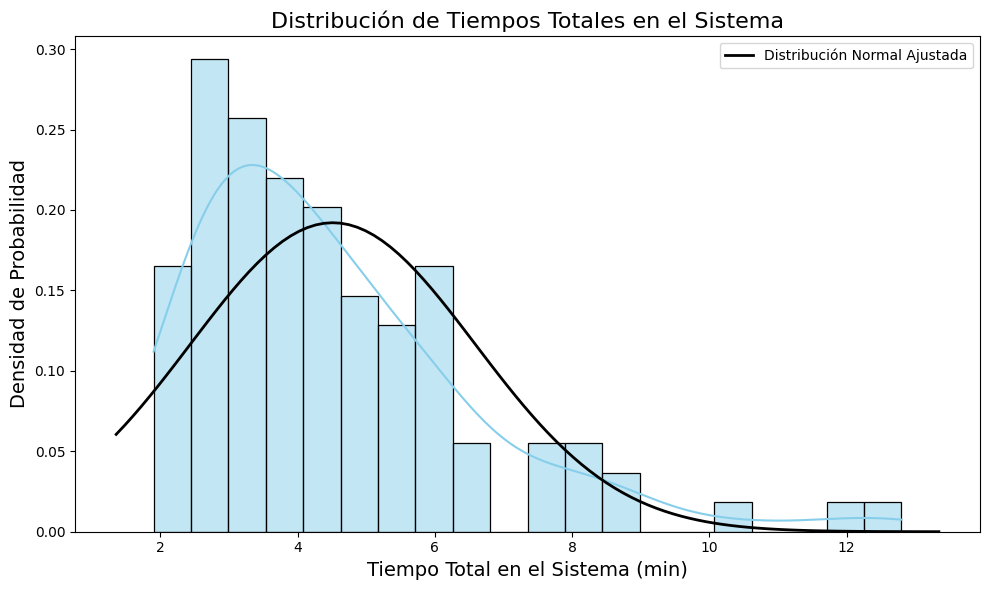

Media ajustada: 4.51 minutos
Desviación estándar ajustada: 2.08 minutos


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Crear el gráfico de distribución normal
plt.figure(figsize=(10, 6))

# Tiempos totales en el sistema
tiempos_totales = df_simulado["Tiempo_Total_Sistema_Minutos"]

# Graficar histograma de los tiempos totales
sns.histplot(tiempos_totales, kde=True, stat="density", bins=20, color='skyblue', linewidth=0.9)

# Ajustar una distribución normal a los tiempos totales para superponerla
mu, std = stats.norm.fit(tiempos_totales)  # Ajuste de la normal
xmin, xmax = plt.xlim()  # Rango del gráfico
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # Densidad de probabilidad normal
plt.plot(x, p, 'k', linewidth=2, label="Distribución Normal Ajustada")

# Añadir títulos y etiquetas
plt.title("Distribución de Tiempos Totales en el Sistema", fontsize=16)
plt.xlabel("Tiempo Total en el Sistema (min)", fontsize=14)
plt.ylabel("Densidad de Probabilidad", fontsize=14)

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Información estadística
print(f"Media ajustada: {mu:.2f} minutos")
print(f"Desviación estándar ajustada: {std:.2f} minutos")


In [33]:
import pandas as pd 
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel(r"C:\Users\oscar\Downloads\materias.xlsx")

In [38]:
df

,Nombre orig,Clave,1,2,3,4,5
0,Modelos y simulación,2039,9,13,17,29,17
1,Análisis de Regresión,2032,4,7,15,20,18
2,Derivados,2033,10,6,12,6,20
3,Evaluación de Proyectos,2049,14,10,9,12,9
4,Muestreo,2041,13,7,7,8,8
5,Auditoria Actuarial,2046,6,14,4,4,9
6,Análisis Multivariado,2031,4,11,10,6,5
7,Investigación de Operaciones II,2037,10,3,10,1,12
8,Estadística Bayesiana,2048,4,4,8,5,14
9,Series de Tiempo,2055,4,13,6,3,0


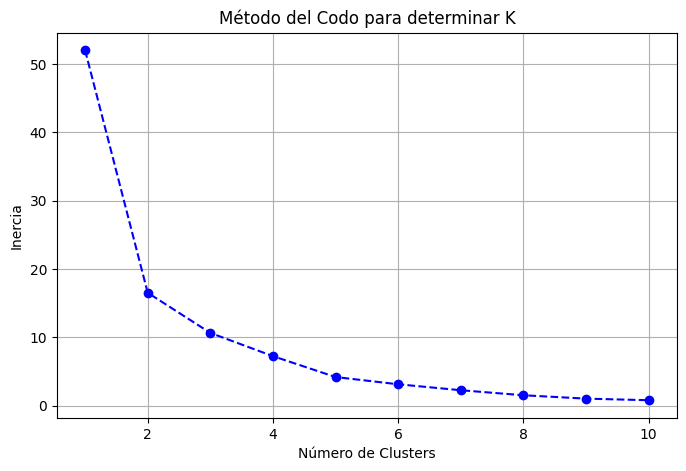

In [36]:
# Seleccionar solo las columnas relevantes
X = df[[1, 5]]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters con el método del codo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para determinar K")
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas relevantes
X = df[[1, 5]]

# Normalizar los datos
# K = 2

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

df["Cluster"] = kmeans.fit_predict(X_scaled)


In [40]:
df


,Nombre orig,Clave,1,2,3,4,5,Cluster
0,Modelos y simulación,2039,9,13,17,29,17,2
1,Análisis de Regresión,2032,4,7,15,20,18,0
2,Derivados,2033,10,6,12,6,20,2
3,Evaluación de Proyectos,2049,14,10,9,12,9,4
4,Muestreo,2041,13,7,7,8,8,4
5,Auditoria Actuarial,2046,6,14,4,4,9,0
6,Análisis Multivariado,2031,4,11,10,6,5,3
7,Investigación de Operaciones II,2037,10,3,10,1,12,2
8,Estadística Bayesiana,2048,4,4,8,5,14,0
9,Series de Tiempo,2055,4,13,6,3,0,3


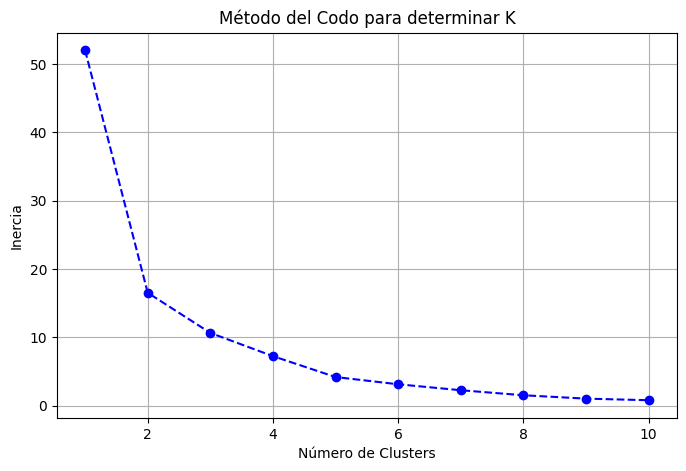

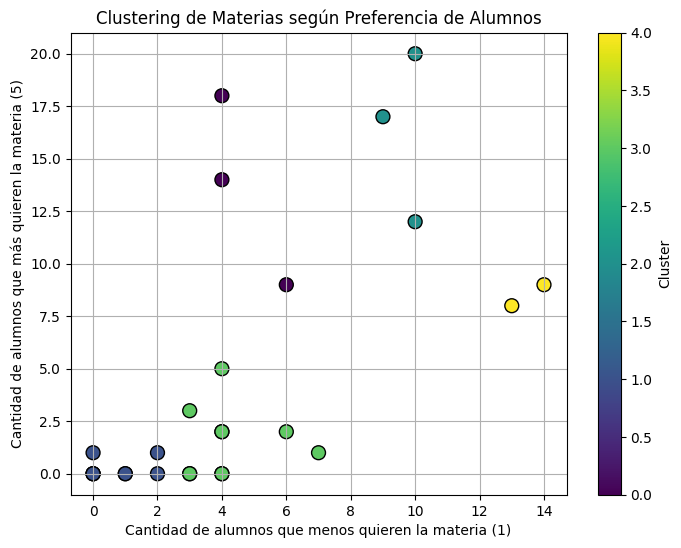

In [ ]:

inertia = []
k_values = range(1, 11)

for k in k_values:
    # con k = 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para determinar K")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df[1], df[5], c=df["Cluster"], cmap="viridis", edgecolors="k", s=100)
plt.xlabel("Cantidad de alumnos que menos quieren la materia (1)")
plt.ylabel("Cantidad de alumnos que más quieren la materia (5)")
plt.title("Clustering de Materias según Preferencia de Alumnos")
plt.colorbar(scatter, label="Cluster")
plt.grid()
plt.show()

In [50]:
df.query("Cluster == 0")

,Nombre orig,Clave,1,2,3,4,5,Cluster
1,Análisis de Regresión,2032,4,7,15,20,18,0
5,Auditoria Actuarial,2046,6,14,4,4,9,0
8,Estadística Bayesiana,2048,4,4,8,5,14,0


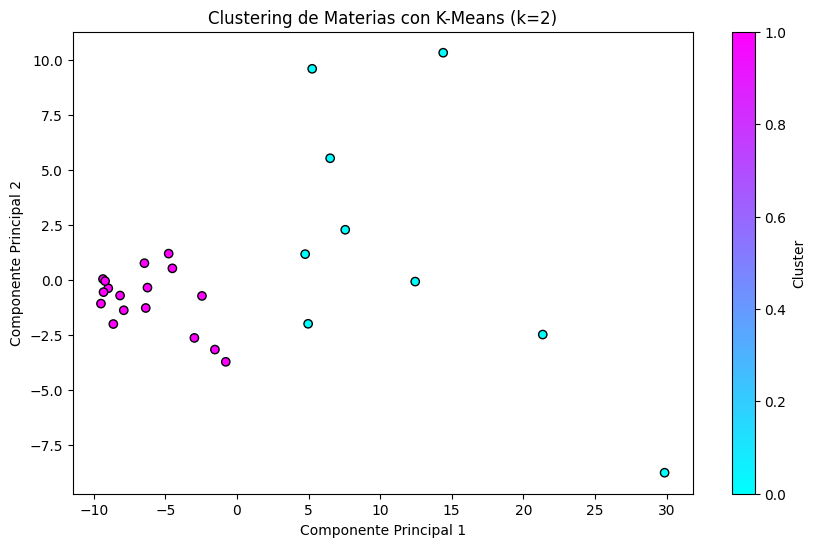

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar los datos
data = {
    "Nombre orig": [
        "Modelos y simulación", "Análisis de Regresión", "Derivados", "Evaluación de Proyectos",
        "Muestreo", "Auditoria Actuarial", "Análisis Multivariado", "Investigación de Operaciones II",
        "Estadística Bayesiana", "Series de Tiempo", "Finanzas Internacionales", "Planeación financiera",
        "Análisis de estados financieros", "Economía matemática II", "Análisis de Datos Categóricos",
        "Finanzas Públicas", "Matemáticas Actuariales Aplicadas", "Presupuesto de capital", "Fianzas",
        "Contabilidad de Seguros", "Procesos Estocásticos II", "Seguros de Personas",
        "Legislación de Seguros", "Análisis Econométrico", "Estadística de Seguros",
        "Modelos Microeconométricos"
    ],
    "Clave": [
        2039, 2032, 2033, 2049, 2041, 2046, 2031, 2037, 2048, 2055, 2051, 2043, 2044, 2034, 2030, 2035,
        2040, 2054, 2036, 2047, 2053, 2056, 2038, 2045, 2050, 2042
    ],
    "1": [9, 4, 10, 14, 13, 6, 4, 10, 4, 4, 7, 3, 2, 4, 6, 4, 3, 4, 1, 3, 2, 0, 1, 0, 0, 0],
    "2": [13, 7, 6, 10, 7, 14, 11, 3, 4, 13, 4, 4, 5, 5, 2, 3, 3, 1, 3, 0, 0, 1, 0, 1, 1, 0],
    "3": [17, 15, 12, 9, 7, 4, 10, 10, 8, 6, 4, 2, 5, 3, 2, 0, 2, 3, 1, 0, 0, 0, 1, 1, 0, 0],
    "4": [29, 20, 6, 12, 8, 4, 6, 1, 5, 3, 4, 7, 4, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1],
    "5": [17, 18, 20, 9, 8, 9, 5, 12, 14, 0, 1, 3, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

# Seleccionar solo las columnas de puntuaciones
X = df.iloc[:, 2:]

# Aplicar K-Means con k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizar en 2D con PCA para reducir dimensiones
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# , 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='cool', edgecolors='k')
# for i, txt in enumerate(df['Nombre orig']):
#     plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering de Materias con K-Means (k=2)')
plt.colorbar(label='Cluster')
plt.show()


In [73]:
df

,Nombre orig,Clave,1,2,3,4,5,Cluster
0,Modelos y simulación,2039,9,13,17,29,17,0
1,Análisis de Regresión,2032,4,7,15,20,18,0
2,Derivados,2033,10,6,12,6,20,0
3,Evaluación de Proyectos,2049,14,10,9,12,9,0
4,Muestreo,2041,13,7,7,8,8,0
5,Auditoria Actuarial,2046,6,14,4,4,9,0
6,Análisis Multivariado,2031,4,11,10,6,5,0
7,Investigación de Operaciones II,2037,10,3,10,1,12,0
8,Estadística Bayesiana,2048,4,4,8,5,14,0
9,Series de Tiempo,2055,4,13,6,3,0,1
